# Lesson 2

In [2]:
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [3]:
import requests
import geojson
from pyproj import CRS

url = 'http://geo.stat.fi/geoserver/tilastointialueet/wfs'

params = dict(service='WFS', version='2.0.0', request='GetFeature', 
         typeName='tilastointialueet:kunta4500k', outputFormat='json')

r = requests.get(url, params=params)

data = gpd.GeoDataFrame.from_features(geojson.loads(r.content),  crs="EPSG:3067")
data.head()

,geometry,kunta,vuosi,nimi,namn,name,bbox
0,"POLYGON ((366787.924 7001300.583, 362458.797 6...",005,2022,Alajärvi,Alajärvi,Alajärvi,"[321987.07200161, 6959704.55099558, 366787.924..."
1,"POLYGON ((382543.364 7120022.976, 372645.944 7...",009,2022,Alavieska,Alavieska,Alavieska,"[360962.99200022, 7104339.03799839, 382543.364..."
2,"POLYGON ((343298.204 6961570.195, 345569.224 6...",010,2022,Alavus,Alavo,Alavus,"[303353.32000378, 6922242.40698068, 345569.224..."
3,"POLYGON ((436139.680 6798279.085, 435912.756 6...",016,2022,Asikkala,Asikkala,Asikkala,"[403543.81899999, 6774122.31100019, 442401.762..."
4,"POLYGON ((426631.036 6720528.076, 432565.266 6...",018,2022,Askola,Askola,Askola,"[413073.96299999, 6704555.87800016, 435459.201..."


In [4]:
data.crs

<Derived Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
data = gpd.read_file("data/L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp")
data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,KARTOGLK,ALUEJAKOON,VERSUH,SUUNTA,SIIRT_DX,SIIRT_DY,KORKEUS,ATTR2,ATTR3,geometry
0,None,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,None,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,None,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,None,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,None,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [7]:
data = data[['RYHMA', 'LUOKKA',  'geometry']]
data.rename(columns={'RYHMA':'GROUP', 'LUOKKA':'CLASS'}, inplace=True)
data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


<AxesSubplot:>

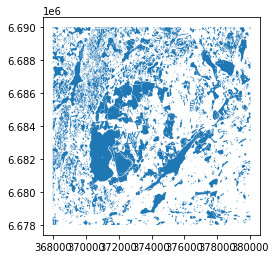

In [8]:
data.plot()

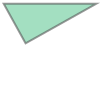

In [9]:
data.at[0, "geometry"]

In [10]:
data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4306     2651.800270
4307      376.503380
4308      413.942555
4309     3487.927677
4310     1278.963199
Length: 4311, dtype: float64

<AxesSubplot:>

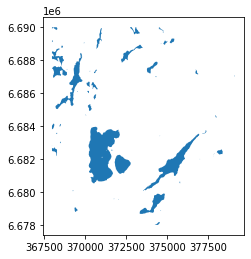

In [12]:
selection = data.loc[data["CLASS"]==36200]
selection.plot()

In [14]:
selection.to_file("data/Class_36200.shp")

/Users/andrewvaccaro/Library/Caches/pypoetry/virtualenvs/python-gis-qMzZCIk8-py3.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

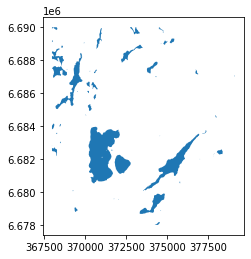

In [16]:
gpd.read_file("data/Class_36200.shp").plot()

In [19]:
import os

grouped = data.groupby("CLASS")

for key, group in grouped:
    group.to_file(os.path.join("data", f"terrain_{key}.shp"))

/Users/andrewvaccaro/Library/Caches/pypoetry/virtualenvs/python-gis-qMzZCIk8-py3.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/andrewvaccaro/Library/Caches/pypoetry/virtualenvs/python-gis-qMzZCIk8-py3.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/andrewvaccaro/Library/Caches/pypoetry/virtualenvs/python-gis-qMzZCIk8-py3.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/andrewvaccaro/Library/Caches/pypoetry/virtualenvs/python-gis-qMzZCIk8-py

In [20]:
grouped.area.sum().round().to_csv(os.path.join("data", "terrain_class_areas.csv"), header=True)

AttributeError: 'DataFrameGroupBy' object has no attribute 'area'